In [1]:
import pandas as pd 
import numpy as np
df2=pd.read_csv(r"movies.csv")
df1=pd.read_csv(r"credits.csv")

In [2]:
df1.columns = ['id','tittle','cast','crew']
big_table= df2.merge(df1,on='id')
big_table.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [3]:
columns_to_remove = ["homepage","keywords","original_language", "tagline", "title","overview", "production_countries", "production_companies","release_date","revenue","runtime","spoken_languages","tagline","title"]

movies = big_table.drop(columns=columns_to_remove, axis=1)
movies

,budget,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,107.376788,Released,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,112.312950,Released,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,43.926995,Released,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,El Mariachi,14.269792,Released,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,Newlyweds,0.642552,Released,5.9,5,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"Signed, Sealed, Delivered",1.444476,Released,7.0,6,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,0,[],126186,Shanghai Calling,0.857008,Released,5.7,7,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [4]:
vote_average_threshold = movies['vote_average'].mean()
vote_count_threshold = movies['vote_count'].mean()
popularity_threshold = movies['popularity'].mean()

# Create the "is_popular" column based on the criteria
movies['liked'] = (
    (movies['vote_average'] >= vote_average_threshold) &
    (movies['vote_count'] >= vote_count_threshold) &
    (movies['popularity'] >= popularity_threshold)
).astype(int)

In [5]:
import ast

def convert_genres(text):
    l = []
    for i in ast.literal_eval(text):
        l.append(i['name'])
    return l

In [6]:
movies['genres'] = movies['genres'].apply(convert_genres)

In [7]:
movies.head(2)

,budget,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,liked
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1


In [8]:
def convert_cast(text):
    l = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            l.append(i['name'])
        counter += 1
    return l

In [9]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head(2)

,budget,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,liked
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1


In [10]:
def fetch_director(text):
    l = []
    for i in ast.literal_eval(text):
        if i['job'] == "Director":
            l.append(i['name'])
            break
    return l

In [11]:
movies['Director'] = movies['crew'].apply(fetch_director)
movies.drop(['crew','status'],axis="columns",inplace=True)
movies.head(2)

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",1,[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",1,[Gore Verbinski]


In [12]:
movies['Director'] = movies['Director'].apply(lambda x: ''.join(x))
movies['genres'] = movies['genres'].apply(lambda x: ''.join(x))
movies['cast'] = movies['cast'].apply(lambda x: ''.join(x))
movies

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,237000000,ActionAdventureFantasyScience Fiction,19995,Avatar,150.437577,7.2,11800,Avatar,Sam WorthingtonZoe SaldanaSigourney Weaver,1,James Cameron
1,300000000,AdventureFantasyAction,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,Johnny DeppOrlando BloomKeira Knightley,1,Gore Verbinski
2,245000000,ActionAdventureCrime,206647,Spectre,107.376788,6.3,4466,Spectre,Daniel CraigChristoph WaltzLéa Seydoux,1,Sam Mendes
3,250000000,ActionCrimeDramaThriller,49026,The Dark Knight Rises,112.312950,7.6,9106,The Dark Knight Rises,Christian BaleMichael CaineGary Oldman,1,Christopher Nolan
4,260000000,ActionAdventureScience Fiction,49529,John Carter,43.926995,6.1,2124,John Carter,Taylor KitschLynn CollinsSamantha Morton,1,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,ActionCrimeThriller,9367,El Mariachi,14.269792,6.6,238,El Mariachi,Carlos GallardoJaime de HoyosPeter Marquardt,0,Robert Rodriguez
4799,9000,ComedyRomance,72766,Newlyweds,0.642552,5.9,5,Newlyweds,Edward BurnsKerry BishéMarsha Dietlein,0,Edward Burns
4800,0,ComedyDramaRomanceTV Movie,231617,"Signed, Sealed, Delivered",1.444476,7.0,6,"Signed, Sealed, Delivered",Eric MabiusKristin BoothCrystal Lowe,0,Scott Smith
4801,0,,126186,Shanghai Calling,0.857008,5.7,7,Shanghai Calling,Daniel HenneyEliza CoupeBill Paxton,0,Daniel Hsia


In [13]:
from sklearn.preprocessing import LabelEncoder
le_genres = LabelEncoder()
le_original_title = LabelEncoder()
le_tittle  = LabelEncoder()
le_cast  = LabelEncoder()
le_Director  = LabelEncoder()


In [14]:
movies['genres']=le_genres.fit_transform(movies['genres'])

movies['original_title']=le_original_title.fit_transform(movies['original_title'])


movies['tittle']=le_tittle.fit_transform(movies['tittle'])
movies['cast']=le_cast.fit_transform(movies['cast'])
movies['Director']=le_Director.fit_transform(movies['Director'])

movies

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,237000000,64,19995,372,150.437577,7.2,11800,379,3932,1,886
1,300000000,332,285,2665,139.082615,6.9,4500,2648,2269,1,770
2,245000000,33,206647,3188,107.376788,6.3,4466,3181,960,1,1972
3,250000000,135,49026,3594,112.312950,7.6,9106,3612,794,1,361
4,260000000,76,49529,1891,43.926995,6.1,2124,1901,4287,1,94
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,141,9367,1138,14.269792,6.6,238,1145,640,0,1896
4799,9000,527,72766,2463,0.642552,5.9,5,2442,1232,0,606
4800,0,482,231617,3081,1.444476,7.0,6,3072,1330,0,1998
4801,0,0,126186,3034,0.857008,5.7,7,3021,972,0,440


In [15]:
# x=movies.drop('genres',axis='columns')
# y=movies['genres']
x=movies.drop('liked',axis='columns')
y=movies['liked']

In [16]:
x['vote_average'] = x['vote_average'].astype(int)
x.dtypes
x.isnull().any()

budget            False
genres            False
id                False
original_title    False
popularity        False
vote_average      False
vote_count        False
tittle            False
cast              False
Director          False
dtype: bool

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

# Create a new DataFrame with scaled values and column names
X = pd.DataFrame(scaled_data, columns=x.columns)
X

,budget,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,Director
0,5.107181,-1.712060,-0.419128,-1.463003,4.053183,1.122229,8.999729,-1.458104,1.170248,-0.459022
1,6.654402,-0.794803,-0.641374,0.191475,3.696258,0.289143,3.086200,0.179399,-0.045445,-0.627444
2,5.303653,-1.818160,1.685526,0.568838,2.699638,0.289143,3.058657,0.564057,-1.002356,1.117761
3,5.426449,-1.469055,-0.091779,0.861780,2.854798,1.122229,6.817394,0.875103,-1.123706,-1.221278
4,5.672039,-1.670988,-0.086108,-0.366993,0.705198,0.289143,1.161467,-0.359700,1.429762,-1.608940
...,...,...,...,...,...,...,...,...,...,...
4798,-0.707916,-1.448520,-0.538967,-0.910308,-0.227028,0.289143,-0.366329,-0.905293,-1.236284,1.007415
4799,-0.713098,-0.127396,0.175909,0.045725,-0.655378,-0.543943,-0.555076,0.030732,-0.803517,-0.865559
4800,-0.713319,-0.281413,1.967083,0.491633,-0.630170,1.122229,-0.554266,0.485393,-0.731877,1.155510
4801,-0.713319,-1.931106,0.778263,0.457721,-0.648637,-0.543943,-0.553456,0.448588,-0.993584,-1.106577


In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' and 'y' are your features and labels respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert the dataset into an optimized data structure called Dmatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the XGBoost model
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'objective': 'binary:logistic',  # binary classification
    'nthread': 4,  # the number of threads to use
    'eval_metric': 'logloss'  # evaluation metric
}
num_round = 100  # the number of training iterations

# Training the model
bst = xgb.train(param, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in preds]

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


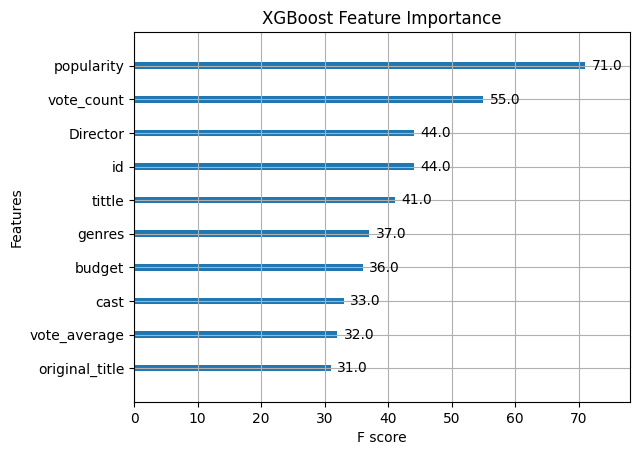

In [21]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming 'bst' is your trained XGBoost model
xgb.plot_importance(bst)
plt.title("XGBoost Feature Importance")
plt.show()


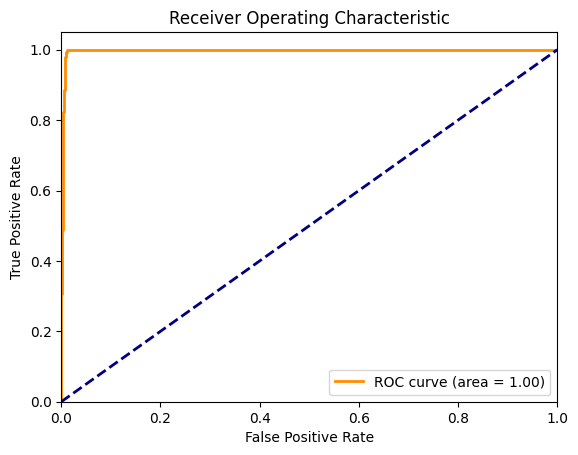

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict the probability of each class
y_pred_proba = bst.predict(dtest)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_test are the true labels and y_pred are the predictions made by your model

# Calculate Precision
precision = precision_score(y_test, predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall
recall = recall_score(y_test, predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1:.2f}')

# Generate and display Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)


Precision: 0.96
Recall: 0.99
F1 Score: 0.98
Confusion Matrix:
[[1125   11]
 [   2  303]]
